## CTR Définition

Le taux de clics (TDC ou CTR) est un rapport entre le nombre de clics qu'un élément reçoit et le nombre d'affichages de celui-ci. Il s'exprime en pourcentage. Par exemple, si une bannière publicitaire est affichée 1 000 fois et reçoit 10 clics, le taux de clics sera de 1 %.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Lecture du fichier Excel
file_path = '../Clean_data/Appareils_all.xlsx'

# Lecture du fichier
df = pd.read_excel(file_path)

# Filtrer pour exclure la catégorie "Global"
df = df[df['Source'] != 'Global']

# Vérification des colonnes disponibles
print("Colonnes disponibles:", df.columns.tolist())
print("Sources disponibles après filtrage:", df['Source'].unique())

Colonnes disponibles: ['Appareil', 'Clics', 'Impressions', 'CTR', 'Position', 'Source']
Sources disponibles après filtrage: ['manufacturer URL' 'Tesla KWD' 'Electric KWD' 'Electric URL']


# Analyses globales par type d'appareil

=== Statistiques par appareil ===
                             Clics  Impressions     CTR  Position
Appareil   Source                                                
Mobile     Electric KWD         73         9077  0.0080     15.34
           Electric URL        449        27057  0.0166     13.97
           Tesla KWD          1270        71407  0.0178     12.77
           manufacturer URL   6456       599182  0.0108     11.92
Ordinateur Electric KWD         91        15689  0.0058     21.45
           Electric URL        458        33081  0.0138     19.55
           Tesla KWD           725        59012  0.0123     19.42
           manufacturer URL   3353       349886  0.0096     20.43
Tablette   Electric KWD          1           84  0.0119      4.39
           Electric URL         25          227  0.1101      4.21
           Tesla KWD            34          637  0.0534      5.96
           manufacturer URL    194         3927  0.0494      7.89

=== Comparaison des types de sources ===


<Figure size 1500x800 with 0 Axes>

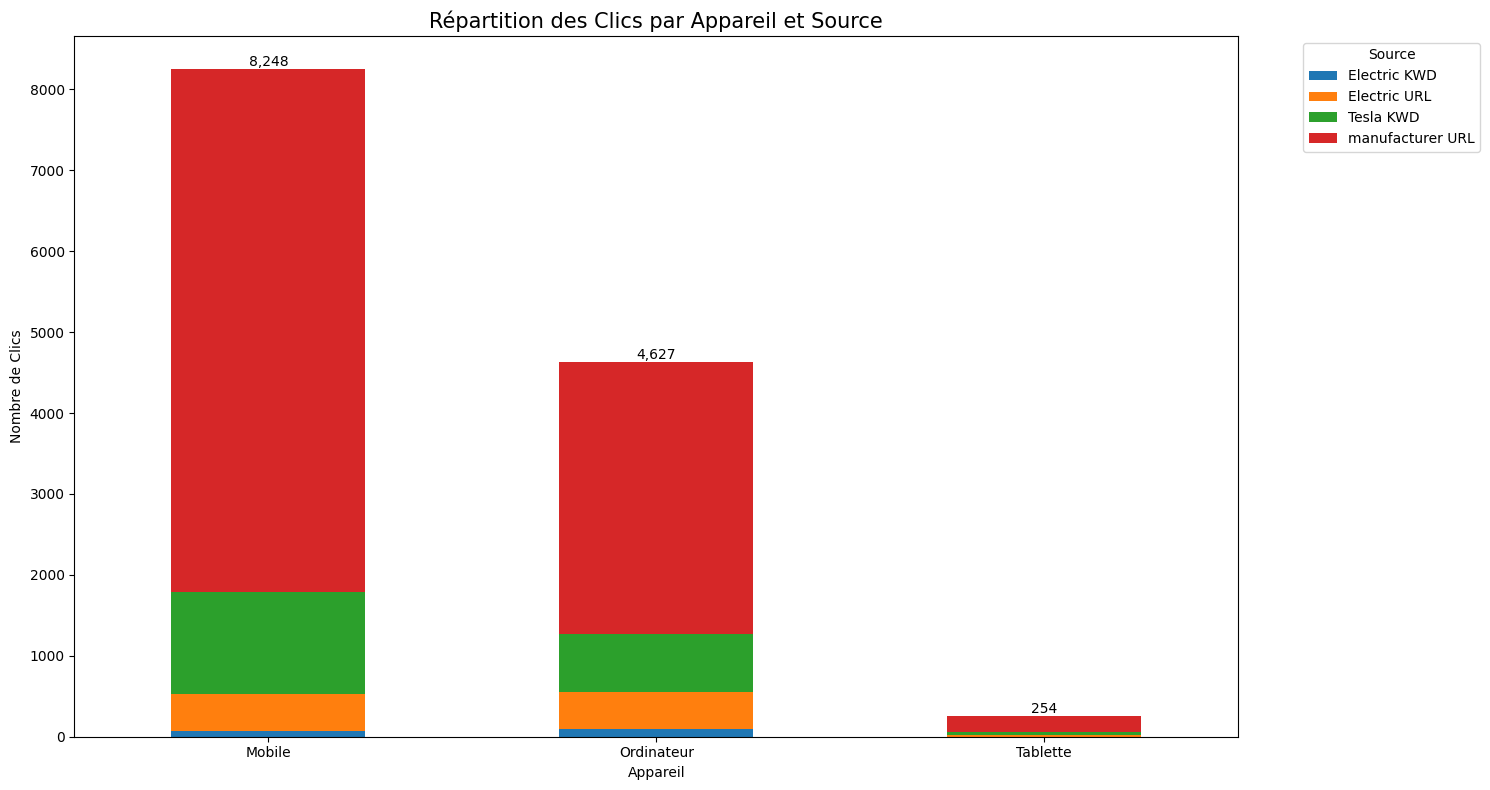

<Figure size 1500x800 with 0 Axes>

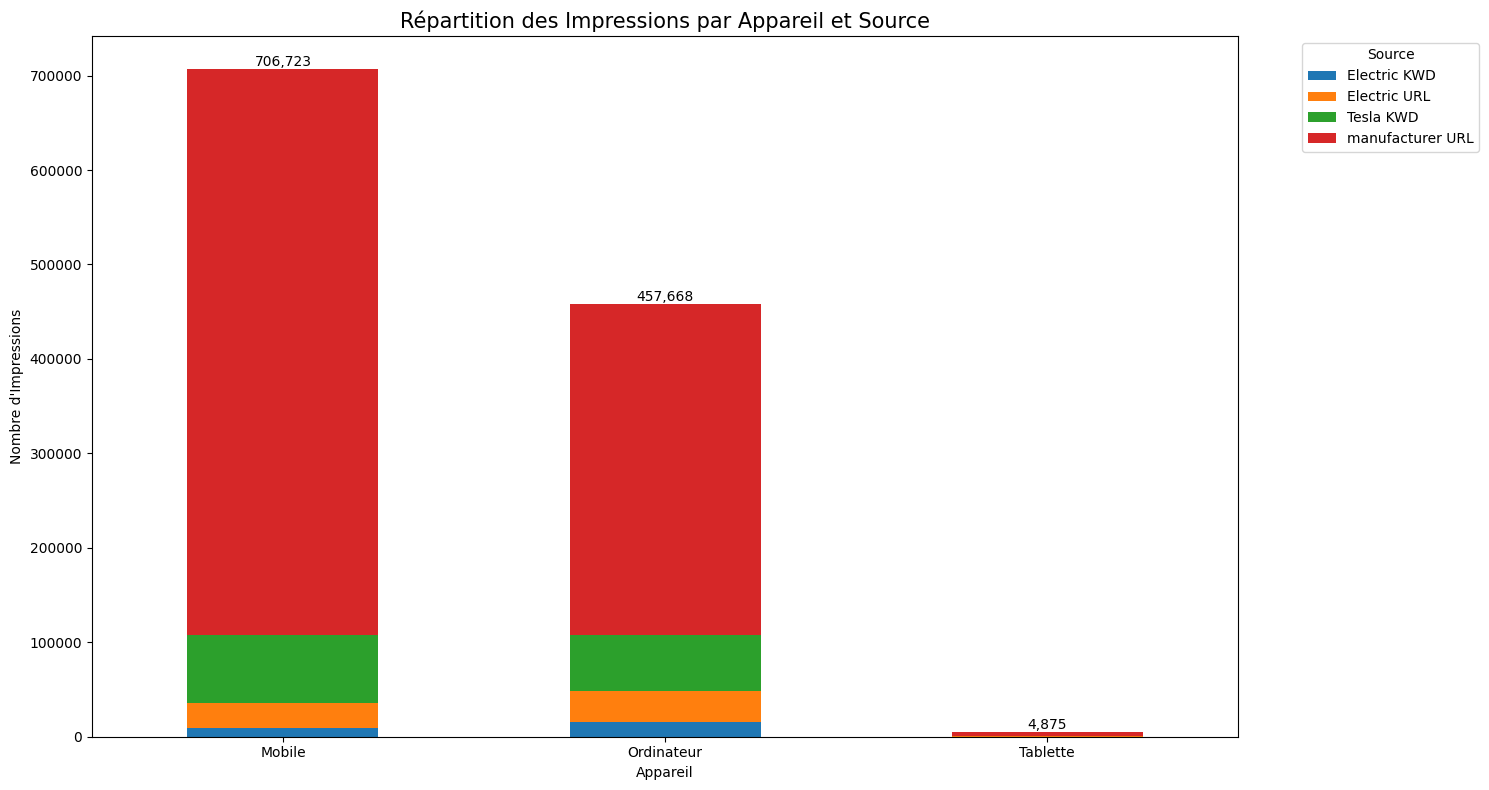


=== KPIs Globaux ===
Total Clics: 13129
Total Impressions: 1169266
CTR Moyen: 0.0266
Position Moyenne: 13.11


In [3]:

def generate_device_stats(df_filtered):
    """
    Générer des statistiques détaillées par appareil et source
    """
    return df_filtered.groupby(['Appareil', 'Source']).agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': 'mean',
        'Position': 'mean'
    }).round(4)

def compare_campaign_types(df_filtered):
    """
    Comparer les performances par type de source
    """
    return df_filtered.groupby('Source').agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': 'mean',
        'Position': 'mean'
    }).round(4)

def plot_device_clicks_by_source(df_filtered):
    """
    Générer un graphique des clics par appareil et type de source en barres empilées
    """
    plt.figure(figsize=(15, 8))
    
    # Calculer les clics par appareil et source
    clics_par_appareil_source = df_filtered.groupby(['Appareil', 'Source'])['Clics'].sum().unstack()
    
    # Créer le graphique à barres empilées
    clics_par_appareil_source.plot(kind='bar', stacked=True, figsize=(15, 8))
    
    plt.title('Répartition des Clics par Appareil et Source', fontsize=15)
    plt.xlabel('Appareil')
    plt.ylabel('Nombre de Clics')
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    
    # Ajouter les valeurs totales sur les barres
    for i, total in enumerate(clics_par_appareil_source.sum(axis=1)):
        plt.text(i, total, f'{total:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Créer le dossier assets s'il n'existe pas
    os.makedirs('../assets', exist_ok=True)
    
    # Sauvegarder la figure
    plt.savefig('../assets/device_clicks_by_source.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_device_impressions_by_source(df_filtered):
    """
    Générer un graphique des impressions par appareil et type de source
    """
    plt.figure(figsize=(15, 8))
    
    # Calculer les impressions par appareil et source
    impressions_par_appareil_source = df_filtered.groupby(['Appareil', 'Source'])['Impressions'].sum().unstack()
    
    # Créer le graphique à barres empilées
    impressions_par_appareil_source.plot(kind='bar', stacked=True, figsize=(15, 8))
    
    plt.title('Répartition des Impressions par Appareil et Source', fontsize=15)
    plt.xlabel('Appareil')
    plt.ylabel('Nombre d\'Impressions')
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    
    # Ajouter les valeurs totales sur les barres
    for i, total in enumerate(impressions_par_appareil_source.sum(axis=1)):
        plt.text(i, total, f'{total:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Sauvegarder la figure
    plt.savefig('../assets/device_impressions_by_source.png', dpi=300, bbox_inches='tight')
    plt.show()

def analyze_positions(df_filtered):
    """
    Analyser les positions moyennes par appareil et source
    """
    return pd.pivot_table(
        df_filtered,
        values='Position',
        index='Appareil',
        columns='Source',
        aggfunc='mean'
    ).round(2)

def analyse_complete(df_filtered):
    """
    Fonction principale pour l'analyse complète
    """
    try:
        print("=== Statistiques par appareil ===")
        device_stats = generate_device_stats(df_filtered)
        print(device_stats)
        
        print("\n=== Comparaison des types de sources ===")
        campaign_stats = compare_campaign_types(df_filtered)
        print(campaign_stats)
        
        print("\n=== Analyse des positions moyennes ===")
        position_stats = analyze_positions(df_filtered)
        print(position_stats)
        
        # Visualisations
        plot_device_clicks_by_source(df_filtered)
        plot_device_impressions_by_source(df_filtered)
        
        # KPIs globaux
        kpis = {
            'Total Clics': df_filtered['Clics'].sum(),
            'Total Impressions': df_filtered['Impressions'].sum(),
            'CTR Moyen': df_filtered['CTR'].mean(),
            'Position Moyenne': df_filtered['Position'].mean().round(2)
        }
        
        print("\n=== KPIs Globaux ===")
        for kpi, value in kpis.items():
            if kpi == 'CTR Moyen':
                print(f"{kpi}: {value:.4f}")
            else:
                print(f"{kpi}: {value}")
        
        return {
            'device_stats': device_stats,
            'campaign_stats': campaign_stats,
            'position_stats': position_stats,
            'kpis': kpis
        }
    
    except Exception as e:
        print(f"Une erreur s'est produite: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

resultat = analyse_complete(df)

# Taux d'impression (Reach) par appareil

Reach (Impressions totales) par appareil :
Appareil
Mobile        706723
Ordinateur    457668
Tablette        4875
Name: Impressions, dtype: int64

Répartition en pourcentage :
Appareil
Mobile        60.44
Ordinateur    39.14
Tablette       0.42
Name: Impressions, dtype: float64


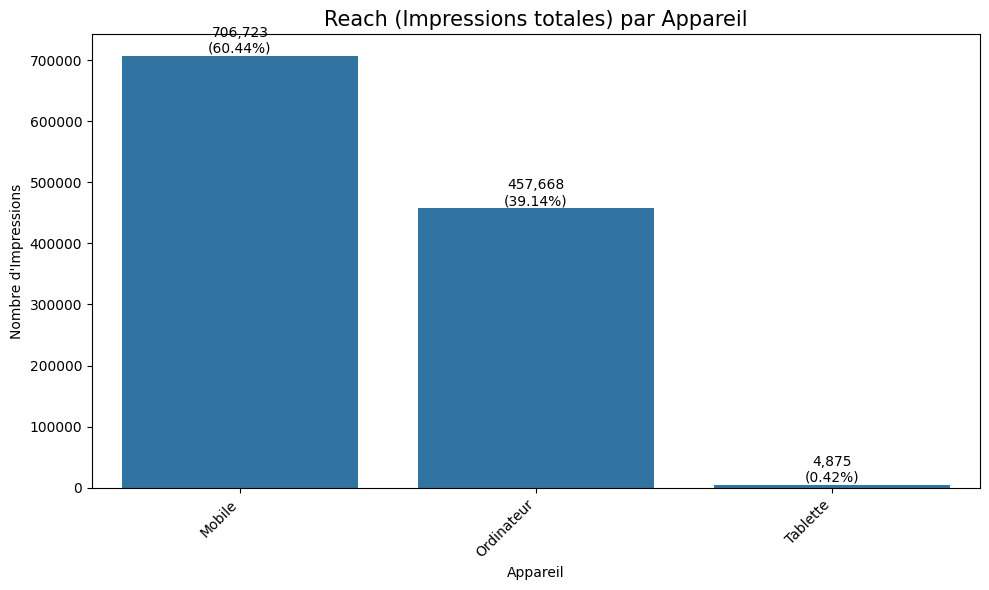

In [5]:
def calcul_reach_par_appareil(df_filtered):
    """
    Calculer et visualiser le nombre total d'impressions par appareil
    """
    # Calculer les impressions par appareil
    reach_par_appareil = df_filtered.groupby('Appareil')['Impressions'].sum()
    
    # Calculer le pourcentage
    reach_pourcentage = (reach_par_appareil / reach_par_appareil.sum() * 100).round(2)
    
    # Afficher les résultats textuels
    print("Reach (Impressions totales) par appareil :")
    print(reach_par_appareil)
    print("\nRépartition en pourcentage :")
    print(reach_pourcentage)
    
    # Créer un graphique à barres
    plt.figure(figsize=(10, 6))
    
    # Graphique à barres avec seaborn
    ax = sns.barplot(x=reach_par_appareil.index, y=reach_par_appareil.values)
    
    # Personnaliser le graphique
    plt.title('Reach (Impressions totales) par Appareil', fontsize=15)
    plt.xlabel('Appareil')
    plt.ylabel('Nombre d\'Impressions')
    plt.xticks(rotation=45, ha='right')
    
    # Ajouter les valeurs et pourcentages sur les barres
    for i, (impressions, pourcent) in enumerate(zip(reach_par_appareil, reach_pourcentage)):
        ax.text(i, impressions, f'{impressions:,.0f}\n({pourcent:.2f}%)', 
                ha='center', va='bottom')
    
    # Ajuster la mise en page
    plt.tight_layout()
    
    # Créer le dossier assets s'il n'existe pas
    os.makedirs('../assets', exist_ok=True)
    
    # Sauvegarder l'image
    plt.savefig('../assets/reach_par_appareil.png', dpi=300, bbox_inches='tight')
    
    # Afficher le graphique
    plt.show()
    
    return reach_par_appareil

resultat = calcul_reach_par_appareil(df)

# Répartition des clics par appareil

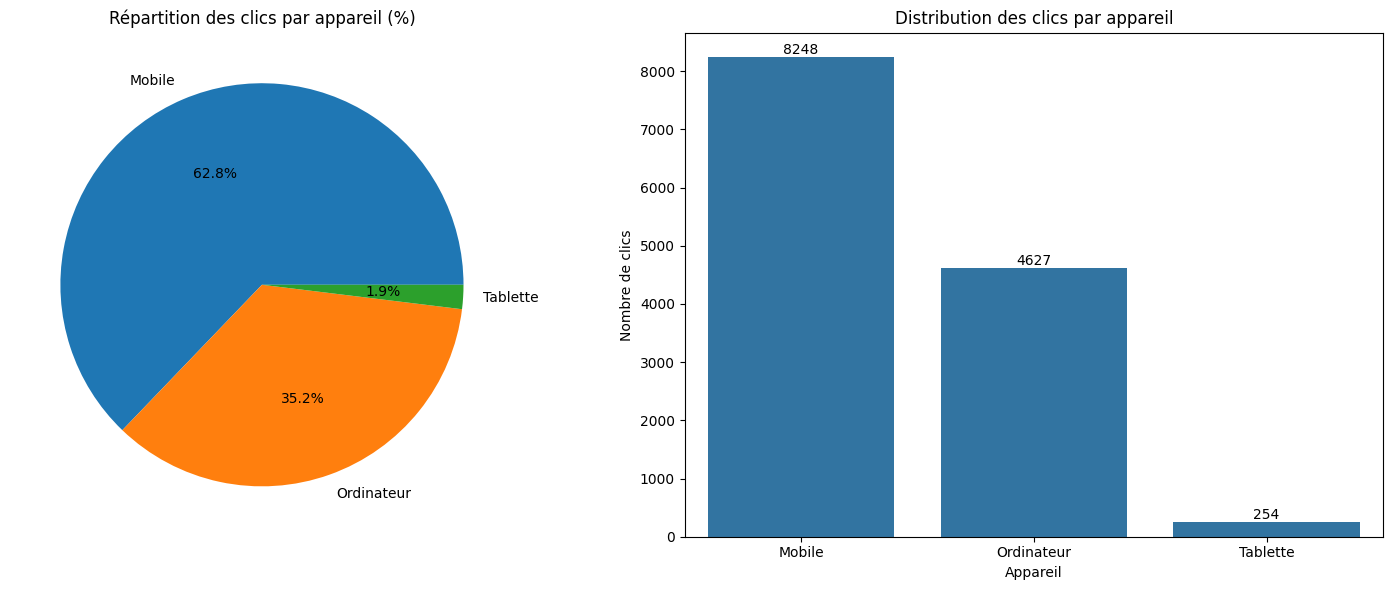

In [6]:
def visualiser_repartition_clics():
    """
    Générer un graphique à secteurs et à barres de la répartition des clics par appareil
    """
    # Calculer le total des clics par appareil
    clics_par_appareil = df.groupby('Appareil')['Clics'].sum()
    
    # Créer une figure avec deux sous-graphiques
    plt.figure(figsize=(15, 6))
    
    # Graphique à secteurs
    plt.subplot(1, 2, 1)
    plt.pie(clics_par_appareil, labels=clics_par_appareil.index, autopct='%1.1f%%')
    plt.title('Répartition des clics par appareil (%)')
    
    # Graphique à barres
    plt.subplot(1, 2, 2)
    sns.barplot(x=clics_par_appareil.index, y=clics_par_appareil.values)
    plt.title('Distribution des clics par appareil')
    plt.xlabel('Appareil')
    plt.ylabel('Nombre de clics')
    
    # Ajouter les valeurs sur les barres
    for i, v in enumerate(clics_par_appareil.values):
        plt.text(i, v, str(int(v)), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Appeler la fonction
visualiser_repartition_clics()

In [7]:
def calcul_volume_clics():
    """
    Calculer le volume total de clics par appareil et par source
    """
    clics_par_appareil = df.groupby('Appareil')['Clics'].sum()
    clics_par_source = df.groupby('Source')['Clics'].sum()
    
    print("Volume de clics par appareil :")
    print(clics_par_appareil)

    print("\nVolume de clics par source :")
    print(clics_par_source)

   

calcul_volume_clics()

Volume de clics par appareil :
Appareil
Mobile        8248
Ordinateur    4627
Tablette       254
Name: Clics, dtype: int64

Volume de clics par source :
Source
Electric KWD          165
Electric URL          932
Tesla KWD            2029
manufacturer URL    10003
Name: Clics, dtype: int64


# Clics par source et appareil

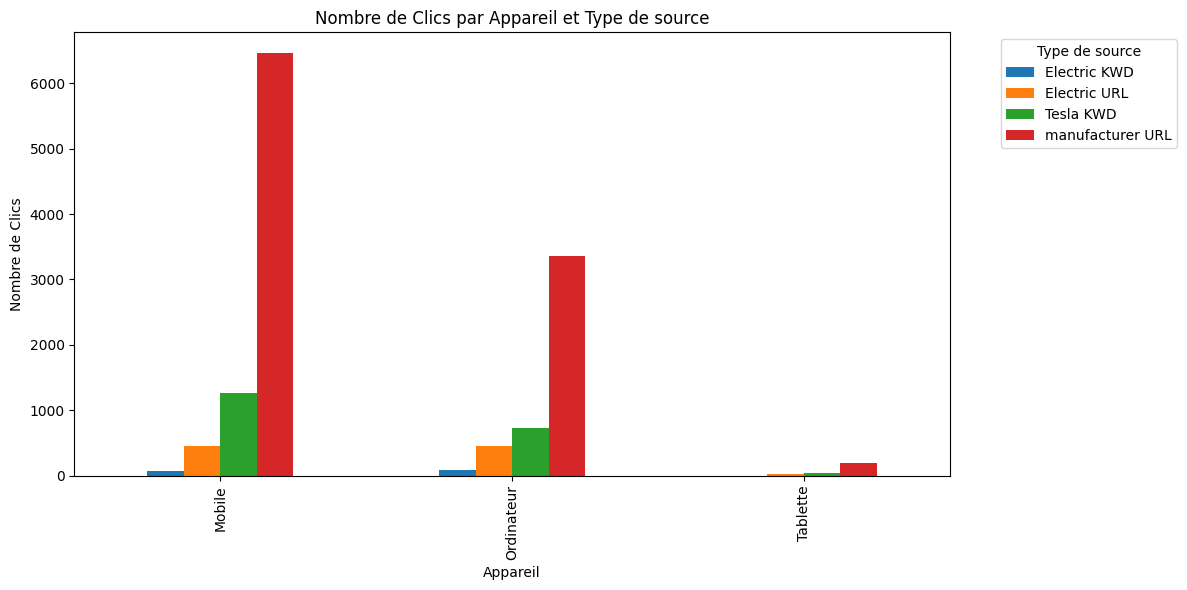

In [8]:
def visualiser_performance_source_appareil():
    """
    Générer un graphique à barres groupées de la performance par source et appareil
    """
    # Agréger les données par appareil et source
    performance = df.groupby(['Appareil', 'Source'])['Clics'].sum().unstack()
    
    plt.figure(figsize=(12, 6))
    performance.plot(kind='bar', stacked=False, ax=plt.gca())
    plt.title('Nombre de Clics par Appareil et Type de source')
    plt.xlabel('Appareil')
    plt.ylabel('Nombre de Clics')
    plt.legend(title='Type de source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    plt.show()

visualiser_performance_source_appareil()

# Position par appareil

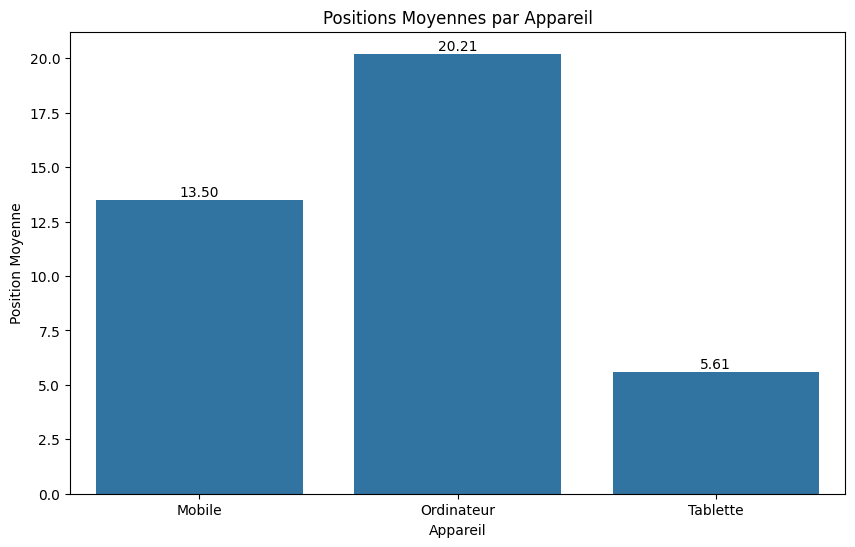

In [9]:
def visualiser_positions_par_appareil():
    """
    Générer un graphique à barres des positions moyennes par appareil
    """
    # Calculer les positions moyennes par appareil
    positions_par_appareil = df.groupby('Appareil')['Position'].mean()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=positions_par_appareil.index, y=positions_par_appareil.values)
    plt.title('Positions Moyennes par Appareil')
    plt.xlabel('Appareil')
    plt.ylabel('Position Moyenne')
    
    # Ajouter les valeurs sur les barres
    for i, v in enumerate(positions_par_appareil.values):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
    
    plt.show()

visualiser_positions_par_appareil()

# CTR moyen par appareil

Le taux de conversion (CTR - Click-Through Rate) est un indicateur clé en marketing digital qui mesure le pourcentage de personnes ayant cliqué sur une annonce ou un lien par rapport au nombre total de personnes l'ayant vue (impressions).

### Formule de calcul :
CTR = (Nombre de clics / Nombre d'impressions) × 100

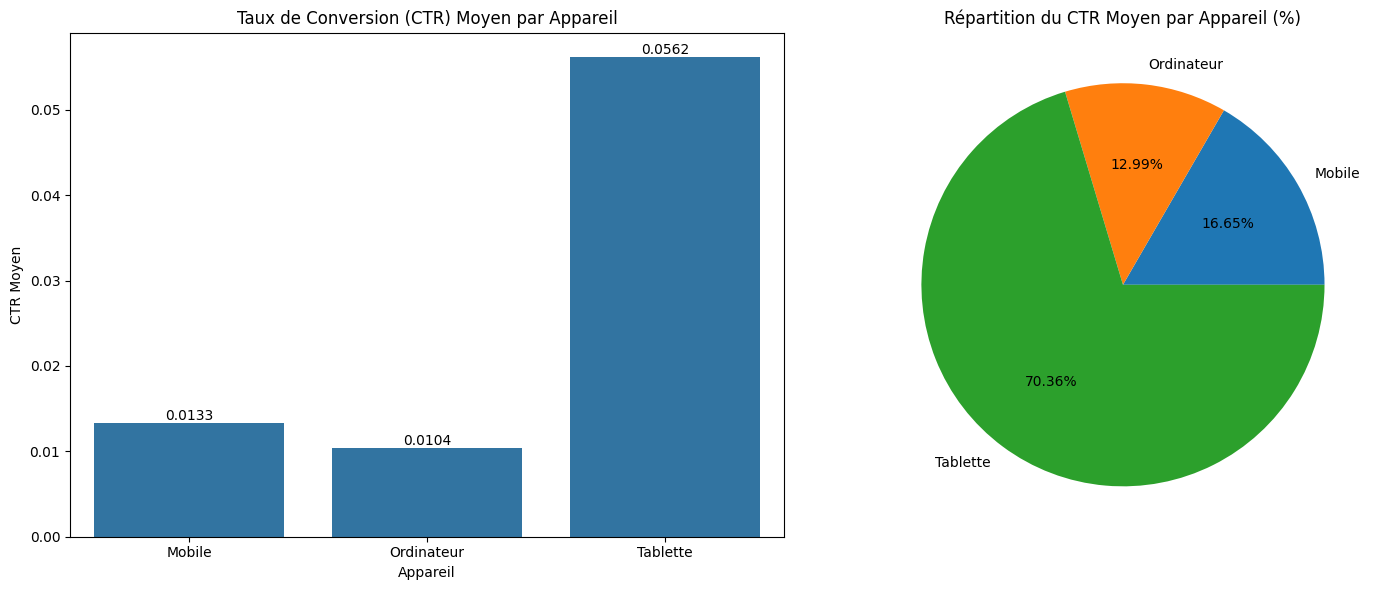

In [49]:
def visualiser_ctr_par_appareil():
    """
    Générer un graphique à barres et un diagramme en cercle du CTR moyen par appareil
    """
    # Calculer le CTR moyen par appareil
    ctr_par_appareil = df.groupby('Appareil')['CTR'].mean()
    
    # Créer une figure avec deux sous-graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Premier graphique : CTR en valeurs décimales
    sns.barplot(x=ctr_par_appareil.index, y=ctr_par_appareil.values, ax=ax1)
    ax1.set_title('Taux de Conversion (CTR) Moyen par Appareil')
    ax1.set_xlabel('Appareil')
    ax1.set_ylabel('CTR Moyen')
    
    # Ajouter les valeurs sur les barres (valeurs décimales)
    for i, v in enumerate(ctr_par_appareil.values):
        ax1.text(i, v, f'{v:.4f}', ha='center', va='bottom')
    
    # Deuxième graphique : Diagramme en cercle des pourcentages de CTR
    ctr_pourcentage = ctr_par_appareil * 100
    ax2.pie(ctr_pourcentage, labels=ctr_pourcentage.index, autopct='%1.2f%%')
    ax2.set_title('Répartition du CTR Moyen par Appareil (%)')
    
    plt.tight_layout()
    plt.show()

visualiser_ctr_par_appareil()

# CTR par source

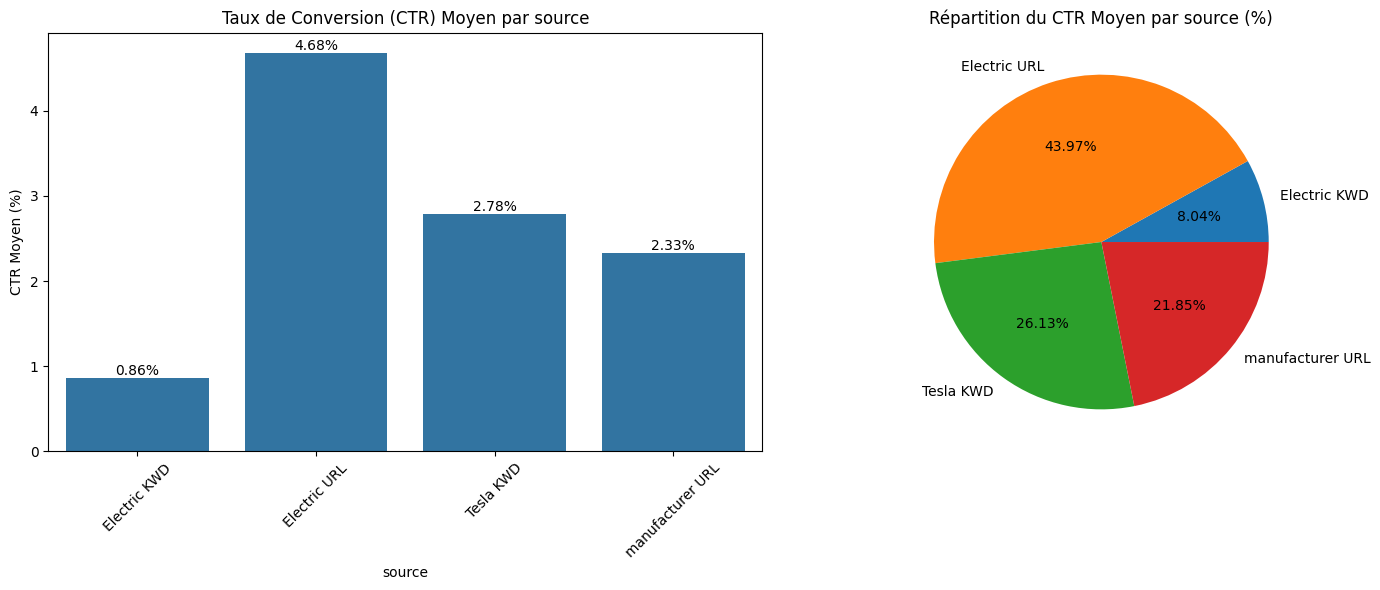

In [59]:
def visualiser_ctr_par_source():
    """
    Générer des graphiques du CTR moyen par type de source
    """
    # Calculer le CTR moyen par source
    ctr_par_source = df.groupby('Source')['CTR'].mean() * 100
    
    # Créer une figure avec deux sous-graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Premier graphique : Barres du CTR par source
    sns.barplot(x=ctr_par_source.index, y=ctr_par_source.values, ax=ax1)
    ax1.set_title('Taux de Conversion (CTR) Moyen par source')
    ax1.set_xlabel('source')
    ax1.set_ylabel('CTR Moyen (%)')
    ax1.tick_params(axis='x', rotation=45)
    
    # Ajouter les valeurs sur les barres
    for i, v in enumerate(ctr_par_source.values):
        ax1.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
    
    # Deuxième graphique : Diagramme en cercle
    ax2.pie(ctr_par_source, labels=ctr_par_source.index, autopct='%1.2f%%')
    ax2.set_title('Répartition du CTR Moyen par source (%)')
    
    plt.tight_layout()
    plt.show()

visualiser_ctr_par_source()

# CTR par source et par appareil

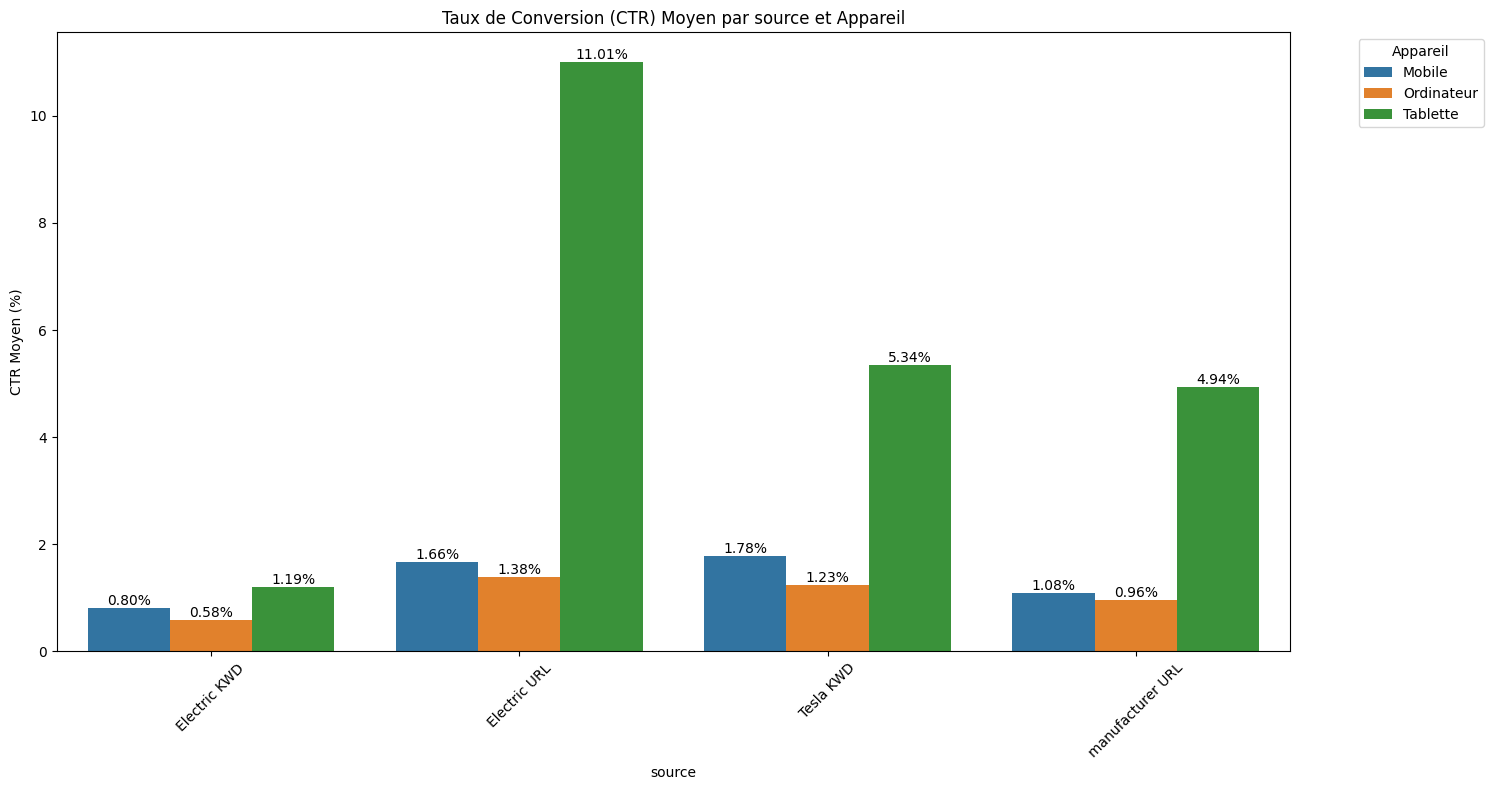

In [61]:
def visualiser_ctr_par_source_et_appareil():
    """
    Générer des graphiques du CTR moyen par source et appareil
    """
    # Calculer le CTR moyen par source et appareil
    ctr_par_source_appareil = df.groupby(['Source', 'Appareil'])['CTR'].mean() * 100
    
    # Convertir en DataFrame pour faciliter la manipulation
    ctr_df = ctr_par_source_appareil.reset_index()
    
    # Créer une figure
    plt.figure(figsize=(15, 8))
    
    # Graphique à barres groupées
    sns.barplot(x='Source', y='CTR', hue='Appareil', data=ctr_df)
    plt.title('Taux de Conversion (CTR) Moyen par source et Appareil')
    plt.xlabel('source')
    plt.ylabel('CTR Moyen (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Appareil', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajouter les valeurs sur les barres
    for i in plt.gca().containers:
        plt.gca().bar_label(i, fmt='%.2f%%')
    
    plt.tight_layout()
    plt.show()

visualiser_ctr_par_source_et_appareil()

# Performance (CTR) par position

In [52]:
def analyse_performance_par_position():
    """
    Analyser la relation entre la position et les performances
    """
    performance_position = df.groupby('Position').agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': 'mean'
    })
    performance_position['Efficacité'] = performance_position['Clics'] / performance_position['Impressions'] * 100
    
    print("Performance par position :")
   
    return performance_position

analyse_performance_par_position()

Performance par position :


,Clics,Impressions,CTR,Efficacité
Position,,,,
4.21,25,227,0.1101,11.013216
4.39,1,84,0.0119,1.190476
5.96,34,637,0.0534,5.337520
7.89,194,3927,0.0494,4.940158
11.92,6456,599182,0.0108,1.077469
12.77,1270,71407,0.0178,1.778537
13.97,449,27057,0.0166,1.659460
15.34,73,9077,0.0080,0.804230
19.42,725,59012,0.0123,1.228564


## Position moyenne et CTR par type d'appareil

=== Position moyenne, CTR et performance par type d'appareil ===
     Appareil  Position  CTR_calculé  Clics  Impressions
0      Mobile     13.50       0.0117   8248       706723
1  Ordinateur     20.21       0.0101   4627       457668
2    Tablette      5.61       0.0521    254         4875


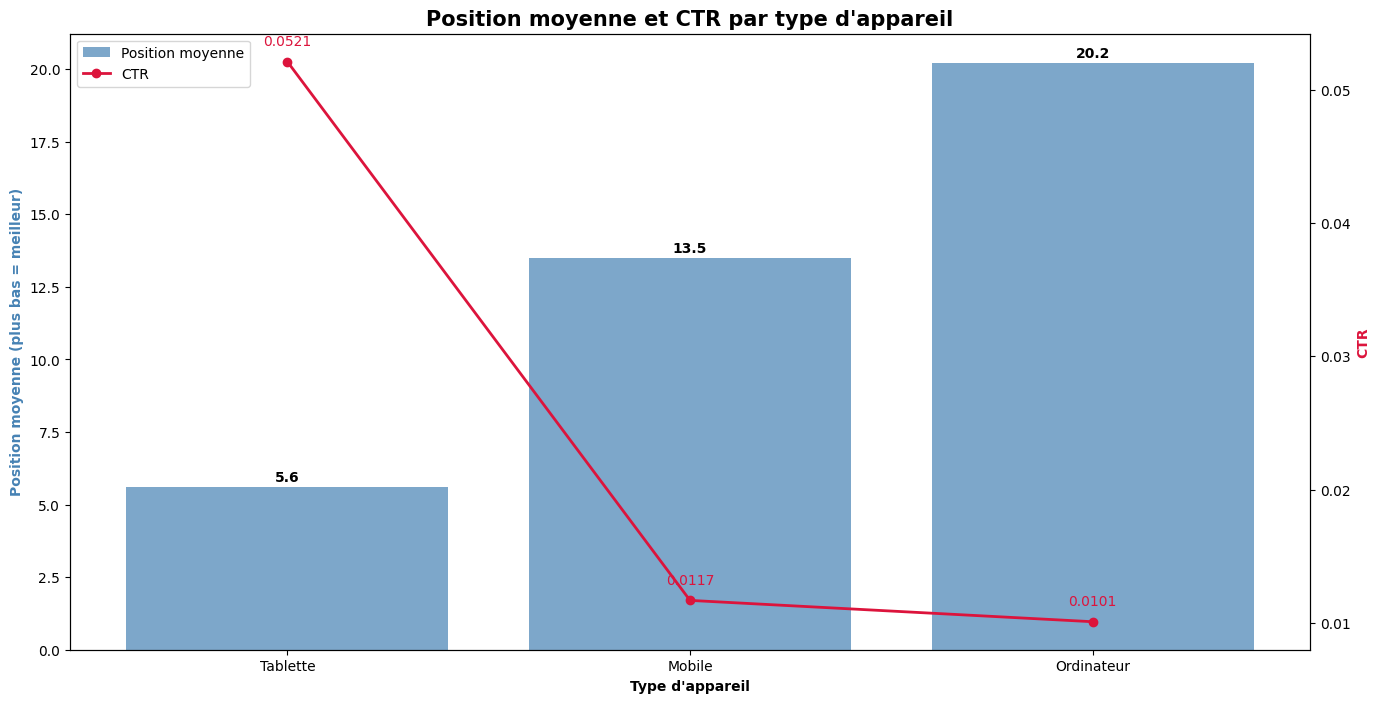

In [74]:
def analyser_performance_par_appareil(df_filtered):
    """
    Analyse détaillée de la performance par type d'appareil
    """
    # Agrégation des données par type d'appareil
    performance_par_appareil = df_filtered.groupby('Appareil').agg({
        'Position': 'mean',
        'Impressions': 'sum',
        'Clics': 'sum',
        'CTR': 'mean'
    }).reset_index()
    
    # Calcul du CTR basé sur les sommes
    performance_par_appareil['CTR_calculé'] = (performance_par_appareil['Clics'] / performance_par_appareil['Impressions']).round(4)
    
    # Arrondir les valeurs pour une meilleure lisibilité
    performance_par_appareil['Position'] = performance_par_appareil['Position'].round(2)
    performance_par_appareil['CTR'] = performance_par_appareil['CTR'].round(4)
    
    # Affichage du tableau récapitulatif
    print("=== Position moyenne, CTR et performance par type d'appareil ===")
    print(performance_par_appareil[['Appareil', 'Position', 'CTR_calculé', 'Clics', 'Impressions']])
    
    # Création du graphique
    plt.figure(figsize=(16, 8))
    
    # Créer deux axes distincts pour position et CTR
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Trier les données par position croissante
    plot_data = performance_par_appareil.sort_values('Position')
    
    # Créer les barres pour la position
    bars = ax1.bar(
        plot_data['Appareil'], 
        plot_data['Position'], 
        color='steelblue', 
        alpha=0.7,
        label='Position moyenne'
    )
    
    # Ligne pour le CTR (axe droit)
    line = ax2.plot(
        plot_data['Appareil'],
        plot_data['CTR_calculé'],
        marker='o',
        color='crimson',
        linewidth=2,
        label='CTR'
    )
    
    # Ajouter les valeurs de position sur les barres
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2.,
            height + 0.1,
            f"{height:.1f}",
            ha='center', 
            va='bottom',
            color='black',
            fontweight='bold'
        )
    
    # Ajouter les valeurs de CTR sur les points
    for i, val in enumerate(plot_data['CTR_calculé']):
        ax2.text(
            i, 
            val + 0.001,
            f"{val:.4f}",
            ha='center', 
            va='bottom',
            color='crimson'
        )
    
    # Personnaliser les axes
    ax1.set_xlabel('Type d\'appareil', fontweight='bold')
    ax1.set_ylabel('Position moyenne (plus bas = meilleur)', color='steelblue', fontweight='bold')
    ax2.set_ylabel('CTR', color='crimson', fontweight='bold')
    
    # Ajouter une légende
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # Ajouter titre
    plt.title('Position moyenne et CTR par type d\'appareil', fontsize=15, fontweight='bold')
    
    # Rotation des étiquettes de l'axe x
    plt.xticks(rotation=45, ha='right')
    
    # Créer le dossier assets s'il n'existe pas
    os.makedirs('../assets', exist_ok=True)
    
    # Sauvegarder l'image
    plt.savefig('../assets/position_ctr_par_appareil.png', dpi=300, bbox_inches='tight')
    
    # Afficher le graphique
    plt.show()
    
    return performance_par_appareil

resultat = analyser_performance_par_appareil(df)

# Indicateur de visibilité 

L'indice de visibilité est une métrique qui mesure la performance d'un résultat dans les recherches en combinant sa position et son taux de clic (CTR). Calculé par la formule (1 / Position moyenne) * CTR moyen * 100, il permet d'évaluer à la fois le placement et l'attractivité d'un résultat. Plus l'indice est élevé, meilleure est la visibilité.

In [53]:
def calcul_indice_visibilite():
    """
    Calculer un indice de visibilité basé sur la position moyenne et le CTR
    """
    indice_visibilite = df.groupby('Appareil').apply(lambda x: 
        (1 / x['Position'].mean()) * x['CTR'].mean() * 100
    )
    
    print("Indice de visibilité (combinaison position et CTR) :")
  
    return indice_visibilite

calcul_indice_visibilite()

Indice de visibilité (combinaison position et CTR) :


/var/folders/c4/gwh8dn4x50x2lbs830bg6dkc0000gn/T/ipykernel_24288/2606981597.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  indice_visibilite = df.groupby('Appareil').apply(lambda x:


Appareil
Mobile        0.098519
Ordinateur    0.051330
Tablette      1.001336
dtype: float64

# Distribution par source

In [68]:
def distribution_source():
    """
    Analyser la distribution des source
    """
    distribution = df.groupby('Source').agg({
        'Clics': 'sum',
        'Impressions': 'sum',
        'CTR': 'mean'
    })
    distribution['Part_Clics'] = distribution['Clics'] / distribution['Clics'].sum() * 100
    distribution['Part_Impressions'] = distribution['Impressions'] / distribution['Impressions'].sum() * 100
    
    print("Distribution des sources :")
    return distribution

distribution_source()

Distribution des sources :


,Clics,Impressions,CTR,Part_Clics,Part_Impressions
Source,,,,,
Electric KWD,165,24850,0.008567,1.256760,2.125265
Electric URL,932,60365,0.046833,7.098789,5.162640
Tesla KWD,2029,131056,0.027833,15.454338,11.208399
manufacturer URL,10003,952995,0.023267,76.190113,81.503695


## Positions moyennes par source et appareil

In [62]:
# Calcul des positions moyennes par source et appareil
positions_par_source = df.groupby(['Source', 'Appareil'])['Position'].mean()
print(positions_par_source)

positions_par_source = df.groupby('Source')['Position'].mean()
print(positions_par_source)


Source            Appareil  
Electric KWD      Mobile        15.34
                  Ordinateur    21.45
                  Tablette       4.39
Electric URL      Mobile        13.97
                  Ordinateur    19.55
                  Tablette       4.21
Tesla KWD         Mobile        12.77
                  Ordinateur    19.42
                  Tablette       5.96
manufacturer URL  Mobile        11.92
                  Ordinateur    20.43
                  Tablette       7.89
Name: Position, dtype: float64
Source
Electric KWD        13.726667
Electric URL        12.576667
Tesla KWD           12.716667
manufacturer URL    13.413333
Name: Position, dtype: float64


# Questions : 

Quel appareil génère le plus de clics ? - Le téléphonne (mobile)

Quelle URL a le meilleur CTR ? - Electric URL

Y a-t-il une corrélation entre la position et le nombre de clics ? - Oui, on le voit avec la tablette qui a le plus faible taux d'impressions et de clicls, mais la meilleure position b(donc meilleur CTR)

## Performance par source :

### Manufacturer URL :


76.19% des clics

81.50% des impressions

CTR moyen : 2.33%


### Tesla KWD :


15.45% des clics

11.21% des impressions

CTR moyen : 2.78%


### Electric URL :


7.10% des clics

5.16% des impressions

CTR moyen : 4.68% (Meilleur taux)


### Electric KWD :


1.26% des clics

2.13% des impressions

CTR moyen : 0.86% (Plus faible performance)

# Stratégie pour la source ; 

Si l'objectif est de donner de la visibilité : favoriser les sources telles que  pour Manufacturer url (elle a aussi la meilleure position mobile) - beaucoup de visibilité mais peur d' "engagement" (CTR)

Si l'objectif est de créer de l'engagement (conversion - avec ici pour seul indice le CTR) : favoriser les sources telles que pour Electric URL

Mais dans les **deux cas**, que ce soit pour la visibilité ou pour "l'engagement", ce sont les URL qui ont donné de meilleurs résultats comparativement aux keyword

## Répartition des Clics et Impressions

### Volume par Appareil :


Mobile : 8 248 clics (62.8%) / 706 723 impressions
Ordinateur : 4 627 clics (35.2%) / 457 668 impressions
Tablette : 254 clics (1.9%) / 4 875 impressions


### Positions Moyennes :


Tablette : 5.61 (Meilleure visibilité)
Mobile : 11.92 (Visibilité moyenne)
Ordinateur : 20.43 (Moins bonne visibilité)


### Taux de Conversion (CTR) :


Tablette : 5.62% (Performance exceptionnelle)
Mobile : 1.33%
Ordinateur : 1.04%

# Support à considérer : 

Le suport le plus utlisé (avec la plus grosse part d'impressions et de clics) est le *mobile*, mais le support avec le plus grand CTR (Click-Through Rate) est la *tablette*

On peut clairement avancer qu'un meilleur CTR sur tablette est lié à sa meilleure position dans les recherches (5.61 contre 11,92 pour le mobile), comme en témoigne l'indice de visibilité ; 

(position moyenne et CTR = indicateur de visibilité)

Mobile        0.098519

Ordinateur    0.051330

Tablette      1.001336

# Observations clés : 

## Dominance Mobile :


Génère la majorité des clics et impressions

Performance moyenne en termes de CTR


## Tablette : Petit Mais Puissant (lol)


Très faible volume

Positions de recherche excellentes

CTR remarquablement élevé


## Source :


Manufacturer URL : Volume maximal

Electric URL : Meilleur taux de conversion

Electric KWD : Performance la plus faible


## Positions :


Meilleure visibilité ne garantit pas le plus de clics

La tablette illustre une haute efficacité malgré un faible volume

Et comme le montre le tableau "Performance par position", une meilleure position influe directement sur un meilleur CTR et une meilleure efficacité